In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [5]:
#Import merged Notebook
df = pd.read_pickle(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\02 Data\Prepared Data\df_cust_prod_merged.pkl")

In [6]:
#2a. PII data compliance. Drop personal data

df.drop(columns = ['First Name', 'Last Name'] )

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,frequency,order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


In [7]:
#3a. Create geographical regions
regions = []

for state in df['State']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri') or (state == 'Kansas'):
        regions.append('Midwest')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        regions.append('Northeast')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        regions.append('South')
    else:
        regions.append('West')

In [8]:
#Create new Region column 

df['Region'] = regions

In [9]:
#Check code

df['Region'].value_counts(dropna = False)

South        10154861
West          8929937
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [10]:
#3b. Determine difference in regional spending habits. Cross 'Region' w/ 'Spending Flag'

crosstab_region_spend = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)
crosstab_region_spend

spending_flag,High spender,Low spender
Region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,193037,9961824
West,176916,8753021


In [11]:
#4a. Exclude low-activity customers. Create flagged column

df.loc[df['max_order'] < 5, 'activity'] = 'low'

In [12]:
#Identify highly active users

df.loc[df['max_order'] > 5, 'activity'] = 'high'

In [13]:
#exclude low activity customers from new df

df_new = df[df['max_order'] > 5]

MARKETING STRATEGY

In [12]:
#5a. Create customer profiles for new marketing strategy. Their status with what they buy. Age-dept

crosstab_age = pd.crosstab(df_new['Age'], df_new['department_id'], dropna = False)
crosstab_age.to_clipboard()

In [13]:
#Age-time

crosstab_age_time = pd.crosstab(df_new['Age'], df_new['order_hour_of_day'], dropna = False)
crosstab_age_time.to_clipboard()

In [14]:
#Age-day

crosstab_age_day = pd.crosstab(df_new['Age'], df_new['order_day_of_week'], dropna = False)
crosstab_age_day.to_clipboard()

In [15]:
#Income-Dept
crosstab_inc_dept = pd.crosstab(df_new['income'], df_new['department_id'], dropna = False)
crosstab_inc_dept.to_clipboard()

In [16]:
#income-time
crosstab_inc_time = pd.crosstab(df_new['income'], df_new['order_hour_of_day'], dropna = False)
crosstab_inc_time.to_clipboard()

In [17]:
#income-day
crosstab_inc_day = pd.crosstab(df_new['income'], df_new['order_day_of_week'], dropna = False)
crosstab_inc_day.to_clipboard()

In [19]:
#family status-dept id
crosstab_fam_dept = pd.crosstab(df_new['fam_status'], df_new['department_id'], dropna = False)
crosstab_fam_dept.to_clipboard()

In [20]:
#Family status that spends the most
crosstab_fam_spend = pd.crosstab(df_new['prices'].sum(), df_new['fam_status'], dropna = False)
crosstab_fam_spend.to_clipboard()


In [24]:
#Fam status-day
crosstab_fam_day = pd.crosstab(df_new['fam_status'], df_new['order_day_of_week'], dropna = False)
crosstab_fam_day.to_clipboard()

In [25]:
#Dept that generated most revenue
crosstab_price_dept = pd.crosstab(df_new['prices'].sum(), df_new['department_id'], dropna = False)
crosstab_price_dept.to_clipboard()

In [26]:
#Customer frequency spending more
crosstab_freq_spend = pd.crosstab(df_new['prices'].sum(), df_new['frequency'], dropna = False)
crosstab_freq_spend.to_clipboard()

In [29]:
#customer frequency determine items purchased
crosstab_freq_dept = pd.crosstab(df_new['department_id'], df_new['frequency'], dropna = False)
crosstab_freq_dept.to_clipboard()

In [45]:
#Family size spending habits
crosstab_family_spend = pd.crosstab(df_new['prices'].sum(), df_new['n_dependants'], dropna = False)
crosstab_family_spend.to_clipboard()

In [28]:
#Key departments with n_dependants
crosstab_depend_dept = pd.crosstab(df_new['department_id'], df_new['n_dependants'], dropna = False)
crosstab_depend_dept.to_clipboard()

In [15]:
#Flag income level
df_new.loc[df_new['income'] <= 50000, 'income_level'] = 'low_income'
df_new.loc[(df_new['income'] <=100000) & (df_new['income'] > 50000), 'income_level'] = 'mid_income'
df_new.loc[df_new['income'] > 100000, 'income_level'] = 'high_income'

C:\Users\18179\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\18179\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\18179\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [16]:
df_new.tail()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity,income_level
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,West,high,mid_income
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,West,high,mid_income
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,West,high,mid_income
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,West,high,mid_income
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Male,Hawaii,25,5/26/2017,0,single,53755,West,high,mid_income


In [17]:
df_new['income_level'].value_counts(dropna = False)

high_income    13863645
mid_income     13058945
low_income      3248834
Name: income_level, dtype: int64

In [18]:
#double check prices, looks like 4.9 fix did not save, but scatterplot visualization is OK. 
df['prices'].max()

99999.0

In [19]:
#Fix prices that are too high. This was done in previous exercise but wanted to make sure, 

df_new.loc[df_new['prices'] > 100, 'prices'] = np.nan

C:\Users\18179\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
#Check, Suggested formula seems to set individual prices. 
df['prices'].max()

99999.0

In [21]:
#income level-spending

crosstab_inc_lev_spend = pd.crosstab(df_new['prices'].mean(), df_new['income_level'])
crosstab_inc_lev_spend.to_clipboard()

In [22]:
#6a. Create visualizations. Import visualization libraries.

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<AxesSubplot:xlabel='prices', ylabel='prices'>

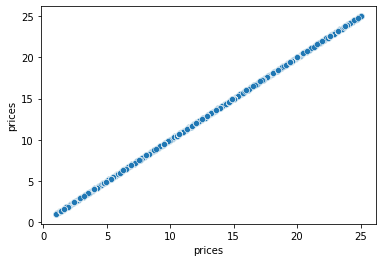

In [23]:
#See what price check visualization looks like. Max price is OK. 
sns.scatterplot(x= 'prices', y = 'prices', data = df_new)

In [24]:
#Assign random numbers, create list of true/ false values 

dev = np.random.rand(len(df_new)) <= 0.7

In [25]:
#Store 70% in big

big = df_new[dev]

In [26]:
#store rest in small

small = df_new[~dev]

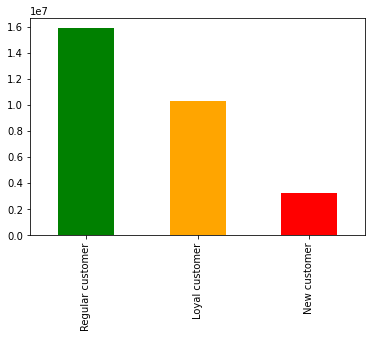

In [30]:
#Customer Loyalty

loyal_bar = df_new['loyalty_flag'].value_counts().plot.bar(color = ['green', 'orange', 'red'])

In [32]:
#Save graph

loyal_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'Loyal_bar.png'))

In [33]:
#Subgroup Loyalty, department id

loyalty_dept_bar = df_new.groupby(['department_id', 'loyalty_flag'])['department_id'].count().unstack('loyalty_flag').fillna(0)

In [86]:
#Edited visual of graph and got this error. Not sure how code changed to make error. Saved previous iteration just in time.

loyalty_dept_bar = loyalty_dept_bar.plot.bar(stacked = True, color = ['orange', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

AttributeError: 'list' object has no attribute 'plot'

In [87]:
#loyalty-Dept

crosstab_loyalty_dept = pd.crosstab(df_new['loyalty_flag'], df_new['department_id'], dropna = False)


In [90]:
#table
crosstab_loyalty_dept
pd.options.display.max_columns = None

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,609460,10715,379873,3147376,38723,78394,855017,25469,242580,13834,123365,202480,560402,221577,294594,1830707,196873,167108,943150,324046,18350
New customer,250628,4027,115923,900269,19147,29599,267473,10937,97266,2869,50816,76005,201703,72066,122109,504120,86321,30771,279962,106929,8491
Regular customer,1140000,17857,568851,4595293,77275,133756,1320235,51711,434720,15468,225499,359837,922727,343094,537284,2596419,374867,196576,1410149,521453,33705


In [82]:
loyalty_dept_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'loyalty_dept_bar.png'))

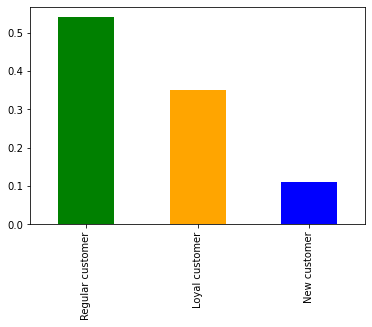

In [66]:
#Loyalty status affects amount spent

loyal_price_bar = df_new['loyalty_flag'].value_counts('prices').plot.bar(color = ['green', 'orange', 'blue'])

In [67]:
loyal_price_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'Loyal_price_bar_1.png'))

In [42]:
#loyalty-time

crosstab_loyalty_time = pd.crosstab(df_new['loyalty_flag'], df_new['order_hour_of_day'], dropna = False)

In [43]:
crosstab_loyalty_time

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,61748,30179,17788,13374,16882,29350,112865,346694,643895,882740,...,835162,809777,743761,584602,449336,360292,309270,264537,206150,123532
New customer,23384,13592,8323,6503,5858,8142,23388,69015,138944,211019,...,276416,279379,272755,231546,183080,136703,99466,75046,61895,40299
Regular customer,110983,58768,35662,25912,25439,42593,134247,414349,807091,1167728,...,1322794,1311906,1266185,1054224,831241,628814,474302,385986,309426,201140


In [46]:
crosstab_loyalty_time.T

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,23384,110983
1,30179,13592,58768
2,17788,8323,35662
3,13374,6503,25912
4,16882,5858,25439
5,29350,8142,42593
6,112865,23388,134247
7,346694,69015,414349
8,643895,138944,807091


In [47]:
crosstab_loyalty_time_T = crosstab_loyalty_time.T

In [44]:
crosstab_loyalty_time.to_clipboard()

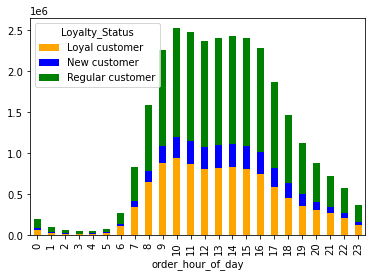

In [69]:
loyalty_time_bar_T = crosstab_loyalty_time_T.plot.bar(stacked= True, color = ['orange', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [70]:
loyalty_time_bar_T.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'loyalty_time_bar_1.png'))

In [54]:
#Loyalty ordering habits-Day

crosstab_loyal_day = pd.crosstab(df_new['loyalty_flag'], df_new['order_day_of_week'], dropna = False)
crosstab_loyal_day.to_clipboard()

In [57]:
crosstab_loyal_day.T

loyalty_flag,Loyal customer,New customer,Regular customer
order_day_of_week,,,
0,1754731,664254,3169000
1,1843401,554270,2749383
2,1352343,417883,2047075
3,1266495,380104,1842622
4,1292042,361768,1797021
5,1456715,398027,1989296
6,1318366,461125,2282379


In [58]:
#save transposed

crosstab_loyal_day_T=crosstab_loyal_day.T

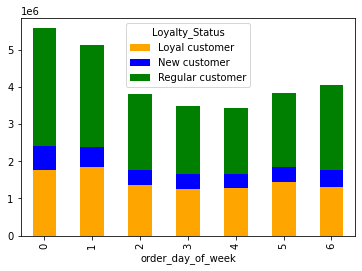

In [71]:
loyalty_day_bar = crosstab_loyal_day_T.plot.bar(stacked= True, color = ['orange', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [72]:
loyalty_day_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'loyalty_day_bar.png'))

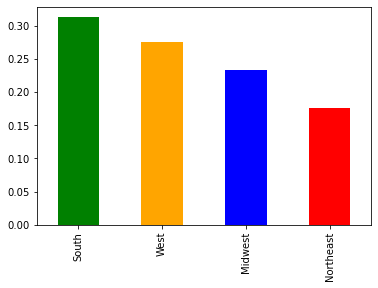

In [191]:
#Crosstab region-population

region_users_bar = df_new['Region'].value_counts('prices').plot.bar(color = ['green', 'orange', 'blue', 'red'])

In [193]:
#save chart

region_users_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'region_user_bar.png'))

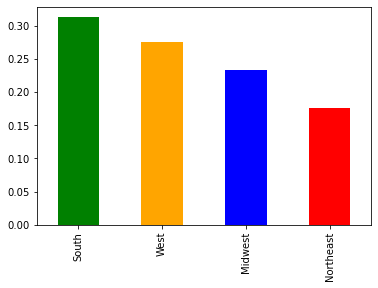

In [95]:
#Loyalty status affects amount spent

region_price_bar = df_new['Region'].value_counts('prices').plot.bar(color = ['green', 'orange', 'blue', 'red'])

In [96]:
region_price_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'region_price_bar.png'))

In [97]:
#Region- Order hour

crosstab_region_time = pd.crosstab(df_new['Region'], df_new['order_hour_of_day'], dropna = False)

In [101]:
crosstab_region_time.T
crosstab_region_time_T.to_clipboard()

In [99]:
crosstab_region_time_T = crosstab_region_time.T

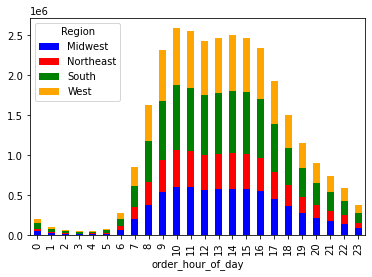

In [103]:
region_time_bar = crosstab_region_time_T.plot.bar(stacked= True, color = ['blue', 'red', 'green', 'orange'])
plt.legend(title='Region')

In [104]:
region_time_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'region_time_bar.png'))

In [106]:
#Regional ordering habits-Day

crosstab_Region_day = pd.crosstab(df_new['Region'], df_new['order_day_of_week'], dropna = False)
crosstab_Region_day.to_clipboard()

In [107]:
crosstab_region_day_T = crosstab_Region_day.T

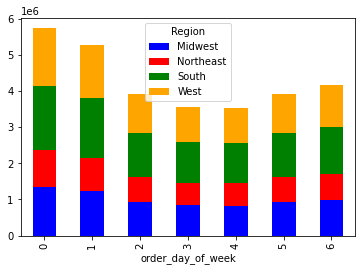

In [108]:
region_day_bar = crosstab_region_day_T.plot.bar(stacked= True, color = ['blue', 'red', 'green', 'orange'])
plt.legend(title='Region')

In [109]:
region_day_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'region_day_bar.png'))

In [110]:
#Frequency of purchases viewed by region and loyalty

region_loyalty_freq = df_new.groupby(['Region', 'loyalty_flag'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

<AxesSubplot:xlabel='Region'>

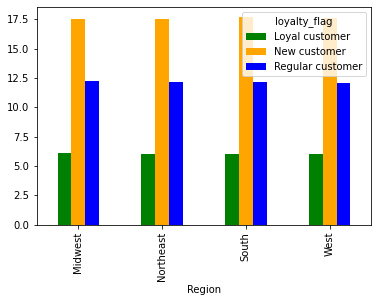

In [119]:
region_loyalty_freq.plot.bar(color = ['green', 'orange', 'blue'])

In [125]:
'hi'

'hi'

In [59]:
#create subset for age-dept_id chart
#plot age-dept id-tried a couple of graphs: processing time was long and will need to create age groups for bar graph to be legible.
df_1 = small[['Age', 'department_id']]

In [62]:
#Create subset for age-price
df_age_price = small[['Age', 'prices']]

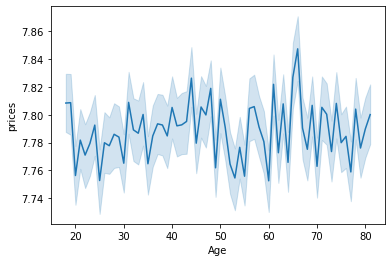

In [63]:
#Plot Age-price

Line_age_Prices = sns.lineplot(data = df_age_price, x = 'Age', y = 'prices')

In [64]:
#save chart
Line_age_Prices.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'Line_age_price.png'))

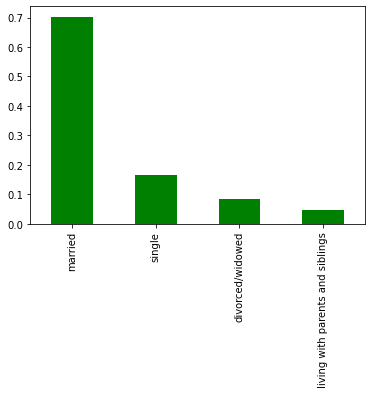

In [139]:
#Family status affects amount spent

bar = df_new['fam_status'].value_counts('prices').plot.bar(color = ['green'])

In [140]:
bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'fam_staus_spending.png'))

In [129]:
#Relate age to family status

crosstab_fam_status_spend = pd.crosstab(df_new['spending_flag'],df_new['fam_status'], dropna=False )
crosstab_fam_status_spend

fam_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High spender,49316,27295,418090,92573
Low spender,2528564,1416786,20770040,4868760


In [138]:
crosstab_fam_status_spend.to_clipboard()

In [134]:
crosstab_age_fam = pd.crosstab(df_new['fam_status'],df_new['Age'], dropna=False )
crosstab_age_fam.T 

fam_status,divorced/widowed,living with parents and siblings,married,single
Age,,,,
18,0,350433,0,115961
19,0,380751,0,102821
20,0,350823,0,117059
21,0,362074,0,114647
22,0,0,352709,125851
...,...,...,...,...
77,111490,0,353472,0
78,120600,0,339886,0
79,115897,0,379415,0


In [135]:
crosstab_age_fam_t = crosstab_age_fam.T  

In [137]:
crosstab_age_fam_t.to_clipboard()

In [142]:
#fam status-hour
crosstab_fam_hour = pd.crosstab(df_new['fam_status'], df_new['order_hour_of_day'], dropna = False)
crosstab_fam_hour.to_clipboard()

In [145]:
crosstab_fam_hour.T

fam_status,divorced/widowed,living with parents and siblings,married,single
order_hour_of_day,,,,
0,15748,10368,141536,34295
1,8347,5411,74734,17511
2,6045,3409,44033,10263
3,4292,2462,32769,7597
4,3910,2616,34884,8034
5,7500,4208,57431,13101
6,23148,14451,191950,46556
7,75950,41544,588907,140034
8,139507,74470,1143709,267711


In [146]:
crosstab_fam_hour_t = crosstab_fam_hour.T

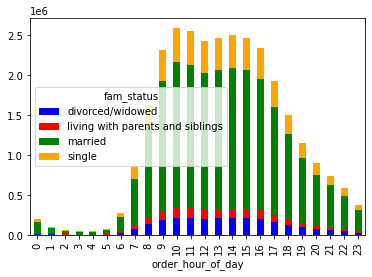

In [148]:
#graph family status with hour of day

fam_hour_bar = crosstab_fam_hour_t.plot.bar(stacked= True, color = ['blue', 'red', 'green', 'orange'])

In [150]:
#Subgroup dependants, department_id

depend_dept_bar = df_new.groupby(['department_id', 'n_dependants'])['department_id'].count().unstack('n_dependants').fillna(0)

<AxesSubplot:xlabel='department_id'>

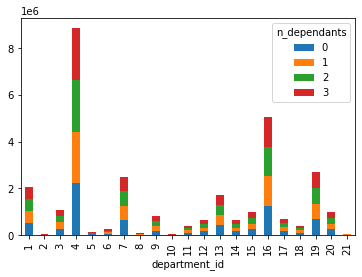

In [151]:
#Plot dependants-dept_id

depend_dept_bar.plot(kind = 'bar', stacked = True)

In [152]:
#Save dependants-Dept_id

depend_dept_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'depend_dept_bar.png'))

AttributeError: 'DataFrame' object has no attribute 'figure'

In [90]:
#Subgroup items purchased based off family status

sub_fam_items = df_new.groupby(['department_id', 'fam_status'])['department_id'].count().unstack('fam_status').fillna(0)

<AxesSubplot:xlabel='department_id'>

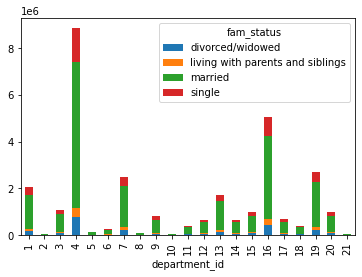

In [91]:
#Stacked bar chart items from each department based off family status

sub_fam_items.plot(kind = 'bar', stacked = True)

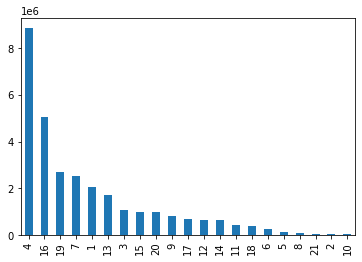

In [93]:
#Rank Department usage

bar_dept_use = df_new['department_id'].value_counts().plot.bar()

In [94]:
bar_dept_use.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'bar_dept_use.png'))

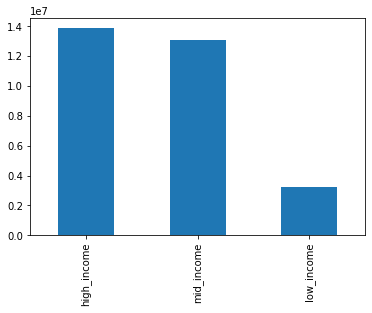

In [95]:
#Income level-amount ordered

bar_income_order = df_new['income_level'].value_counts().plot.bar()

In [96]:
bar_income_order.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'bar_income_order.png'))

In [98]:
#7a. Aggregate Min, mean, Max on customer profile level for expenditure

df_new.groupby('user_id').agg({'prices' : ['min', 'mean', 'max']})

prices                
           min      mean   max
user_id                       
1          1.0  6.367797  14.0
2          1.3  7.515897  14.8
3          1.3  8.197727  14.4
7          1.1  7.466990  23.2
11         1.4  8.328723  14.7
...        ...       ...   ...
206202     1.0  8.156061  17.1
206206     1.1  7.646667  14.8
206207     1.2  7.313453  24.7
206208     1.1  8.366617  21.6
206209     1.1  7.058915  18.8

[146466 rows x 3 columns]

In [100]:
# Aggregate Min, mean, Max on customer profile level for usage frequency

df_new.groupby('user_id').agg({'days_since_prior_order' : ['min', 'mean', 'max']})


days_since_prior_order                 
                           min       mean   max
user_id                                        
1                          0.0  20.259259  30.0
2                          3.0  15.967033  30.0
3                          7.0  11.487179  21.0
7                          2.0  13.546392  30.0
11                         7.0  19.320988  30.0
...                        ...        ...   ...
206202                     3.0  12.093750  30.0
206206                     0.0   4.042705  15.0
206207                     1.0  14.879397  30.0
206208                     0.0   7.442105  20.0
206209                     3.0  20.275862  30.0

[146466 rows x 3 columns]

In [102]:
#8a. Regional comparison of customer profiles. 

Sbar_region = df_new.groupby(['department_id', 'Region'])['department_id'].count().unstack('Region').fillna(0)

<AxesSubplot:xlabel='department_id'>

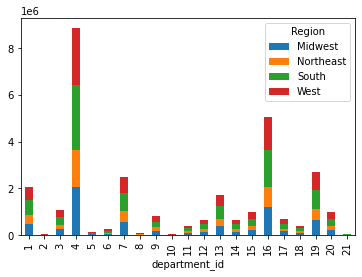

In [104]:
Sbar_region.plot(kind = 'bar', stacked = True)

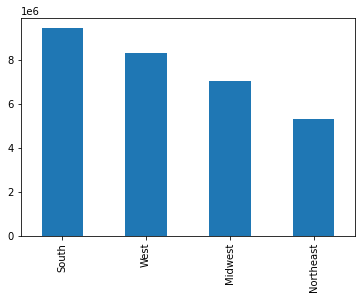

In [105]:
#Number items purchased by region

bar_region_items = df_new['Region'].value_counts().plot.bar()

In [106]:
bar_region_items.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'bar_region_items.png'))

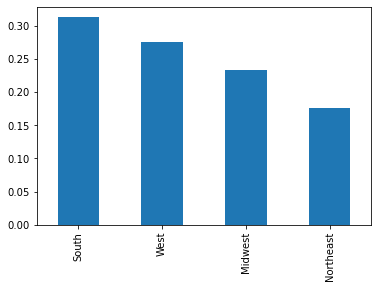

In [110]:
#Amount each region spends

bar_region_spend = df_new['Region'].value_counts('prices').plot.bar()

In [111]:
bar_region_spend.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'bar_region_spend.png'))

In [113]:
#Customer loyalty per region

Sbar_loyal_region = df_new.groupby(['Region', 'loyalty_flag'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

<AxesSubplot:xlabel='Region'>

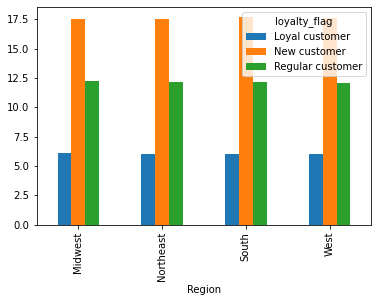

In [114]:
Sbar_loyal_region.plot(kind = 'bar', stacked = False)

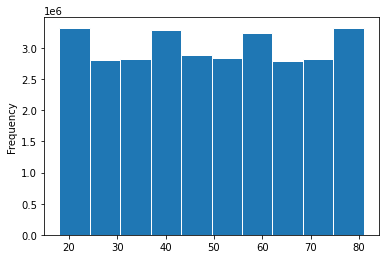

In [167]:
#Age histogram

age_hist = df_new['Age'].plot.hist(bins = 10, edgecolor = 'white')


In [168]:
#Save histogram

age_hist.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'age_hist.png'))

In [172]:
# Aggregate Min, mean, Max on customer age based on price

Age_price_table = df_new.groupby('Age').agg({'prices' : ['min', 'mean', 'max']})
Age_price_table.to_clipboard()

In [173]:
# Aggregate Min, mean, Max on customer age based on frequency

Age_freq_table = df_new.groupby('Age').agg({'frequency' : ['min', 'mean', 'max']})
Age_freq_table.to_clipboard()

In [174]:
# Aggregate Min, mean, Max on dept id based on age

Age_freq_table = df_new.groupby('department_id').agg({'Age' : ['min', 'mean', 'max']})
Age_freq_table.to_clipboard()

In [178]:
#spending & Frequency flag
crosstab_spend_freq= pd.crosstab(df_new['order_frequency_flag'], df_new['spending_flag'], dropna = False)
crosstab_spend_freq

spending_flag,High spender,Low spender
order_frequency_flag,,
Frequent customer,390497,19402210
Non-frequent customer,44090,2463901
Regular customer,128765,6525145


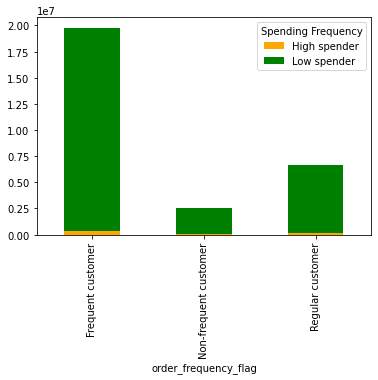

In [183]:
spend_freq_bar = crosstab_spend_freq.plot.bar(stacked = True, color = ['orange', 'green'])
plt.legend(title='Spending Frequency')

In [187]:
#save chart

spend_freq_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'spend_freq_bar.png'))

In [184]:
#income level & Frequency flag
crosstab_income_freq= pd.crosstab(df_new['order_frequency_flag'], df_new['income_level'], dropna = False)
crosstab_income_freq

income_level,high_income,low_income,mid_income
order_frequency_flag,,,
Frequent customer,9115210,2043891,8633606
Non-frequent customer,1122708,319254,1066029
Regular customer,3047390,757329,2849191


In [189]:
crosstab_income_freq.to_clipboard()

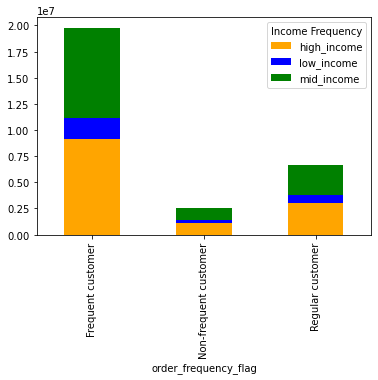

In [186]:
#create graph

income_freq_bar = crosstab_income_freq.plot.bar(stacked = True, color = ['orange', 'blue', 'green'])
plt.legend(title='Income Frequency')

In [188]:
income_freq_bar.figure.savefig(os.path.join(r"C:\Users\18179\Documents\CareerFoundry\InstaCart Basket Analysis\04 Analysis\Visualizations", 'income_freq_bar.png'))